### Project Outline
* ## [POSTGRES DATABASE / ADD STUDENT FUNCTION](#Postgres)
-  Run docker-compose file to create Docker database container
-  Create database named "student_grades" in PgAdmin
-  Connect PgAdmin server/database to Docker container
-  Send data to postgres database using SQL alchemy
-  Use psycopg2 connection to create python function that adds new students to database

* ## [EDA](#EDA)

-  Initialize repository, set up notebook, import data
-  Create GitHub repository, link to local, 1st commit + push
-  EDA
-  Data cleaning, pre-processing, etc.

* ## [Data Preparation](#Dataprep)

-  Separate Target from features
-  Train-Test Split
-  Categorical + Numerical separation, one-hot encoding, scaling etc. 


* ## [MODELING](#Modeling)
### Strategy:  simple train-test split to evaluate overall model performance.  Redo with train-val-test with hyperparameter tuning
-  Choose and build series of models
-  Train, fit, test all models
-  Choose scoring, gridsearch and optimized model run final results
-  Repeat process with new model that does predictions without previous grade data

### ANALYSIS
-  Summarize Model Results
-  Identify Executive Insights
-  Suggest areas for improvements
-  Simplify notebook with functions, pipelines, etc.
-  Final Code Documentation

#### REPORT
-  Outline Written Report
-  Write/Proofread Written Report


In [1]:
# Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Data Preparation
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    LabelEncoder,
    TargetEncoder,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFECV

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

# Model Evaluation
from sklearn import datasets, metrics, svm
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

<a id='Postgres'></a>
## Postgres

In [2]:
data = pd.read_csv("data.csv", sep=";")
df = data.copy(deep=True)

##### Use SQLAlchemy to send data to postgres database
#### Steps:
* Export initial data to postgres database
* Create "New Student" dictionary to add row to database, convert dictionary to DataFrame
* Export new student data to existing database table with if_exists = "append" to add  to end of frame

In [3]:
from Functions import *     # File containing functions to streamline code

# Call data_to_postgres function with df (dataframe to export)
# and 'student_grades' (name of postgres database table)

data_to_postgres(df,'student_grades')

In [4]:
# Import dictionary with new student information
from New_Student_Info import *  
# Call add_new function, passing new_student dictionary and 'student_grades' table name
add_new(new_student, "student_grades")

<a id='EDA'></a>

## EDA: pulled into separate notebook

## Modeling <a class="anchor" id="Modeling"></a>

#### Model_1: First run all regression models on numerical features only with no hyperparamater tuning to get basic performance

In [5]:
# Model with only unprocessed numerical features, no categorical
mse = mean_squared_error
# rmse = mse**0.5
mae = mean_absolute_error
R_2 = r2_score
mape = mean_absolute_percentage_error

# Assuming X is your feature matrix with both numerical and categorical features
# Separate Target
X = df.drop("G3", axis=1)
nums = [col for col in X.columns if X[col].dtype == "int64"]
X = X[nums]
y = df["G3"]

# # # Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# Linear Regression
random_state=42
lr1 = LinearRegression(fit_intercept=True)
lr1.fit(X_train, y_train)
# Support Vector Regression
svr1 = SVR()
svr1.fit(X_train, y_train)
# Linear Support Vector Regression
lsvr1 = LinearSVR(random_state=42)
lsvr1.fit(X_train, y_train)
# Random Forest Regression
rfr1 = RandomForestRegressor(random_state=42)
rfr1.fit(X_train, y_train)
# Gradient Boosted Regression
gbr1 = GradientBoostingRegressor(random_state=42)
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

TRAINING PERFORMANCE


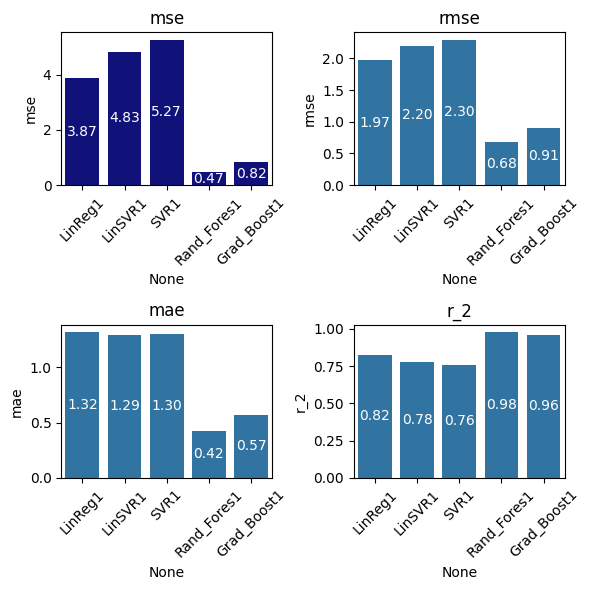

In [6]:
#Training performance
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr1,lsvr1,svr1,rfr1,gbr1]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_train)
    mse = mean_squared_error(y_train, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_train, ipreds)
    r_2 = r2_score(y_train,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
model_1 = pd.DataFrame(scores, index=["LinReg1","LinSVR1","SVR1","Rand_Fores1","Grad_Boost1"], columns=["mse","rmse","mae","r_2"])
# View
print("TRAINING PERFORMANCE")
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot barplots on each subplot
sns.barplot(data=model_1, x=model_1.index, y="mse", ax=axs[0, 0], color='darkblue')
sns.barplot(data=model_1, x=model_1.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=model_1, x=model_1.index, y="mae", ax=axs[1, 0])
sns.barplot(data=model_1, x=model_1.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(model_1.index, model_1["mse"],color='darkblue')
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
#Loop over subplots to add text to bars
for i in range(2):
    for j in range(2):
        for p in axs[i, j].patches:
            axs[i, j].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                           ha='center', va='center',color='white')
fig.tight_layout()
# Show the plot
plt.show()

TEST PERFORMANCE


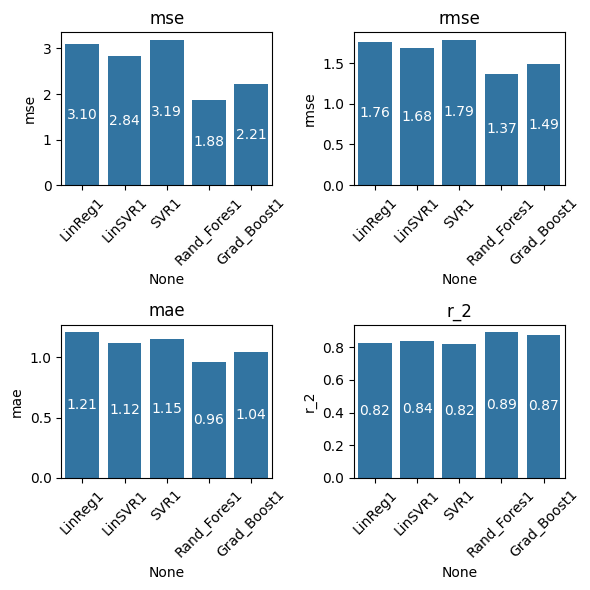

In [7]:
# Test Performance
# Create list of models
model_list = [lr1,lsvr1,svr1,rfr1,gbr1]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_test)
    mse = mean_squared_error(y_test, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_test, ipreds)
    r_2 = r2_score(y_test,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
model_1 = pd.DataFrame(scores, index=["LinReg1","LinSVR1","SVR1","Rand_Fores1","Grad_Boost1"], columns=["mse","rmse","mae","r_2"])
print('TEST PERFORMANCE')
# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot barplots on each subplot
sns.barplot(data=model_1, x=model_1.index, y="mse", ax=axs[0, 0])
sns.barplot(data=model_1, x=model_1.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=model_1, x=model_1.index, y="mae", ax=axs[1, 0])
sns.barplot(data=model_1, x=model_1.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(model_1.index, model_1["mse"],color='darkblue')
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
#Loop over subplots to add text to bars
for i in range(2):
    for j in range(2):
        for p in axs[i, j].patches:
            axs[i, j].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                           ha='center', va='center',color='white')
fig.tight_layout()
# Show the plot
plt.show()

#### ALL models show signigicant overfitting, with Random Forest and Gradient Boosted Regressor performing best overall.  Let's look at train and test scores together.

Train in blue, test in yellow


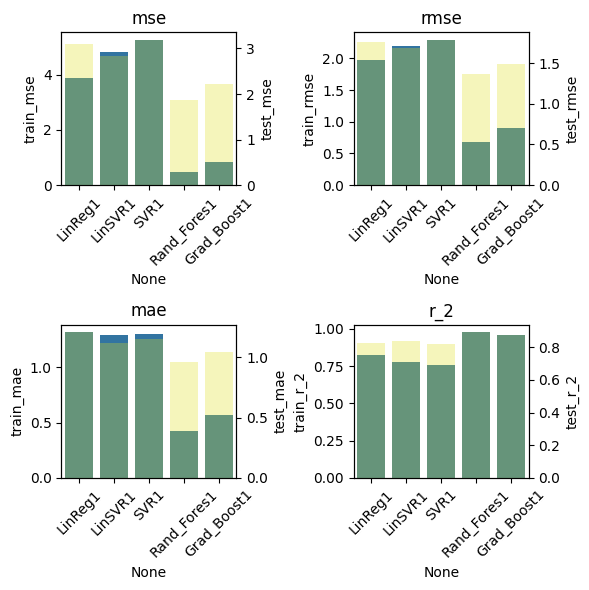

In [8]:
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr1,lsvr1,svr1,rfr1,gbr1]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_1 = pd.DataFrame(scores, index=["LinReg1","LinSVR1","SVR1","Rand_Fores1","Grad_Boost1"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
print("Train in blue, test in yellow")
# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot barplots on each subplot
sns.barplot(data=model_1, x=model_1.index, y="train_mse", ax=axs[0, 0])#,label="Train"
sns.barplot(data=model_1, x=model_1.index, y="train_rmse", ax=axs[0, 1])
sns.barplot(data=model_1, x=model_1.index, y="train_mae", ax=axs[1, 0])
sns.barplot(data=model_1, x=model_1.index, y="train_r_2", ax=axs[1, 1])
# Share axis for test scores
axs2 = [ax.twinx() for ax in axs.flat]
# Plot second set of bars on each subplot
sns.barplot(data=model_1, x=model_1.index, y="test_mse", ax=axs2[0], color='yellow', alpha=0.3)
sns.barplot(data=model_1, x=model_1.index, y="test_rmse", ax=axs2[1], color='yellow', alpha=0.3)
sns.barplot(data=model_1, x=model_1.index, y="test_mae", ax=axs2[2], color='yellow', alpha=0.3)
sns.barplot(data=model_1, x=model_1.index, y="test_r_2", ax=axs2[3], color='yellow', alpha=0.3)
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)

fig.tight_layout()
# axs[0, 0].legend(loc='upper right', fontsize='small')
# Show the plot
# plt.legend()
plt.show()

#### Linear regression, Linear Support Vector Regressor, and Support Vector Regressor models generally show better agreement between train/test, but Random Forest and Gradient Boosted models show much better performance.  Let's try some data processing.  Now we will train the models on the entire data set.  Categorical variables will first be one-hot encoded, and then all variables will be standardized.

## CREATE SCALING FUNCTION: data_prep
Takes data,encoding object(see list), and scaler (see list)

In [9]:
# Define scaling functions, adjust these parameters later
standard = StandardScaler()  # subtract mean, divide by std
minmax = MinMaxScaler()  # subtract min, divide by max - min
OHE = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # create category for each value, 1 and 0's
LE = LabelEncoder()  # assign numeric value for each unique value
TE = TargetEncoder()  # assign weighted mean of target value


# DATA PREPARATION
# Separate Target
def data_prep(data, encoder, scaler):
    X = data.drop("G3", axis=1)
    y = data["G3"]

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Separate Categorical features for encoding
    categorical_features = [col for col in X.columns if X[col].dtype == "object"]

    # CATEGORICAL FEATURE TRANSFORMER
    # transform categorical features and leave numericals alone
    cat_encoder = ColumnTransformer([("cat", encoder, categorical_features)], remainder="passthrough")
    # fit_transform on train features...
    Xtr_cat_encoded = pd.DataFrame(cat_encoder.fit_transform(X_train),columns = [feat.split('__')[1] for feat in cat_encoder.get_feature_names_out()])
    # then then transform test features
    Xte_cat_encoded = pd.DataFrame(cat_encoder.transform(X_test),columns = [feat.split('__')[1] for feat in cat_encoder.get_feature_names_out()])
    train_cols = Xtr_cat_encoded.columns
    
    # SCALER TRANSFORMER
    scale_all = ColumnTransformer([("scale",scaler,train_cols)])
    #fit_transform on all train features...
    X_train_processed = pd.DataFrame(scale_all.fit_transform(Xtr_cat_encoded),columns = [s.split('__')[1] for s in cat_encoder.get_feature_names_out()])
    #then transform all test features
    X_test_processed = pd.DataFrame(scale_all.transform(Xte_cat_encoded),columns = [s.split('__')[1] for s in cat_encoder.get_feature_names_out()])
    return X_train_processed,X_test_processed, y_train, y_test


#### Choose df as data, one hot encode all categorical variables, and use standard scaler.  Assign transformed data to X_train,X_test,y_train,y_test

In [10]:
# Reassigns X_train, X_test
X_train, X_test, y_train, y_test = data_prep(df, OHE, standard)

#### Model_2: First run all basic regression models all data, which has been encoded and scaled

In [11]:
# Data has been Encoded and Scaled, model"p" for processed data
# Model with all features, cats one hot encoded
mse = mean_squared_error
mae = mean_absolute_error
R_2 = r2_score
mape = mean_absolute_percentage_error

# Linear Regression
random_state=42
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(X_train, y_train)
# Support Vector Regression
svr2 = SVR()
svr2.fit(X_train, y_train)
# Linear Support Vector Regression
lsvr2 = LinearSVR(random_state=42)
lsvr2.fit(X_train, y_train)
# Random Forest Regression
rfr2 = RandomForestRegressor(random_state=42)
rfr2.fit(X_train, y_train)
# Gradient Boosted Regression
gbr2 = GradientBoostingRegressor(random_state=42)
gbr2.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

TRAINING PERFORMANCE


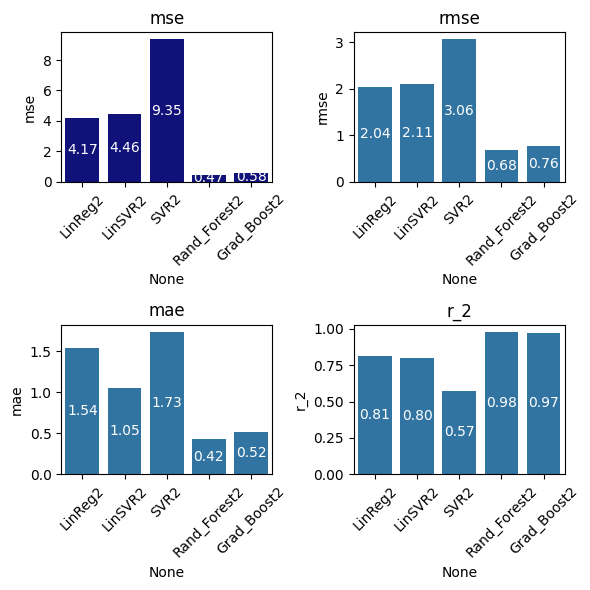

In [12]:
#Training performance
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr2,lsvr2,svr2,rfr2,gbr2]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_train)
    mse = mean_squared_error(y_train, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_train, ipreds)
    r_2 = r2_score(y_train,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
model_2 = pd.DataFrame(scores, index=["LinReg2","LinSVR2","SVR2","Rand_Forest2","Grad_Boost2"], columns=["mse","rmse","mae","r_2"])
print("TRAINING PERFORMANCE")
# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot barplots on each subplot
sns.barplot(data=model_2, x=model_2.index, y="mse", ax=axs[0, 0], color='darkblue')
sns.barplot(data=model_2, x=model_2.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=model_2, x=model_2.index, y="mae", ax=axs[1, 0])
sns.barplot(data=model_2, x=model_2.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(model_2.index, model_2["mse"],color='darkblue')
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
#Loop over subplots to add text to bars
for i in range(2):
    for j in range(2):
        for p in axs[i, j].patches:
            axs[i, j].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                           ha='center', va='center',color='white')
fig.tight_layout()
# Show the plot
plt.show()

TEST PERFORMANCE


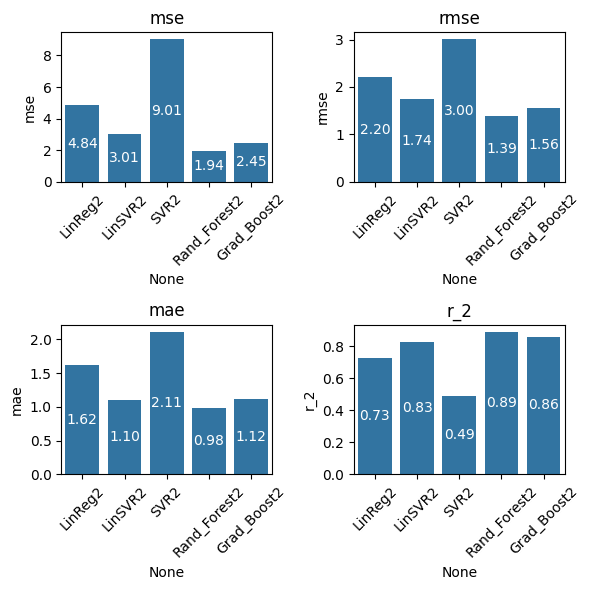

In [13]:
# Test Performance
# Create list of models
model_list = [lr2,lsvr2,svr2,rfr2,gbr2]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_test)
    mse = mean_squared_error(y_test, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_test, ipreds)
    r_2 = r2_score(y_test,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
model_2 = pd.DataFrame(scores, index=["LinReg2","LinSVR2","SVR2","Rand_Forest2","Grad_Boost2"], columns=["mse","rmse","mae","r_2"])
print("TEST PERFORMANCE")
# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot bar2lots on each subplot
sns.barplot(data=model_2, x=model_2.index, y="mse", ax=axs[0, 0])
sns.barplot(data=model_2, x=model_2.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=model_2, x=model_2.index, y="mae", ax=axs[1, 0])
sns.barplot(data=model_2, x=model_2.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(model_2.index, model_2["mse"],color='darkblue')
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
#Loop over subplots to add text to bars
for i in range(2):
    for j in range(2):
        for p in axs[i, j].patches:
            axs[i, j].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                           ha='center', va='center',color='white')
fig.tight_layout()
# Show the plot
plt.show()

#### Performance is even better, but some overfitting still exists.  Let's see training and test together again.

Train in Blue, Test in Yellow


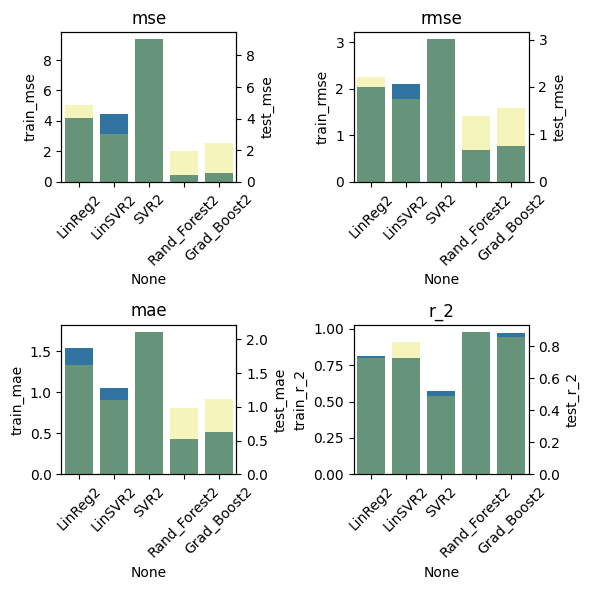

In [14]:
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr2,lsvr2,svr2,rfr2,gbr2]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_2 = pd.DataFrame(scores, index=["LinReg2","LinSVR2","SVR2","Rand_Forest2","Grad_Boost2"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
print("Train in Blue, Test in Yellow")
# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
# plt.title("Train/Test Fit Check")

# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")
# Plot barplots on each subplot
sns.barplot(data=model_2, x=model_2.index, y="train_mse", ax=axs[0, 0])#,label="Train"
sns.barplot(data=model_2, x=model_2.index, y="train_rmse", ax=axs[0, 1])
sns.barplot(data=model_2, x=model_2.index, y="train_mae", ax=axs[1, 0])
sns.barplot(data=model_2, x=model_2.index, y="train_r_2", ax=axs[1, 1])
# Share axis for test scores
axs2 = [ax.twinx() for ax in axs.flat]
# Plot second set of bars on each subplot
sns.barplot(data=model_2, x=model_2.index, y="test_mse", ax=axs2[0], color='yellow', alpha=0.3)
sns.barplot(data=model_2, x=model_2.index, y="test_rmse", ax=axs2[1], color='yellow', alpha=0.3)
sns.barplot(data=model_2, x=model_2.index, y="test_mae", ax=axs2[2], color='yellow', alpha=0.3)
sns.barplot(data=model_2, x=model_2.index, y="test_r_2", ax=axs2[3], color='yellow', alpha=0.3)
# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)

fig.tight_layout()
# axs[0, 0].legend(loc='upper right', fontsize='small')
# Show the plot
# plt.legend()
plt.show()

#### While still overfitting, Random Forest and Gradient Boost still perform best, with a slight performance edge in favor of random forest.  As one more check, let's run a data pipeline that will use some feature selection algorithms with a few different data sets and choose our final model. 

## DATAT PIPELINE

#### First with all data, one-encoded and standardized so the algorithms can chose the best features.

## MAIN PIPELINE: 
#### FEATURE SELECTION + MODEL GRIDSEARCH

##### Model_3: All features, scaled/encoded, SelectKBest(10) Gridsearch

In [15]:
# MAIN PIPELINE FOR TRANSFORMED DATA
random_state=42
k_list = list(np.arange(1,11))
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}

# Choose different number of original features
selection = SelectKBest(score_func=f_regression)

# Use selection features to transform dataset:
X_train_features = selection.fit_transform(X_train, y_train)
X_test_features = selection.transform(X_test)
print("Train space has", X_train_features.shape[1], "features")
print("Test space has", X_test_features.shape[1], "features")


# Regressor models
linreg_grid = LinearRegression()
linsvr_grid = LinearSVR()
svr_grid = SVR()
rfr_grid = RandomForestRegressor()
gbr_grid = GradientBoostingRegressor()

# Do grid search over parameters for each regressor:

linreg_param_grid = dict(
    features__k=k_list, 
    linreg_grid__fit_intercept=[True, False],  # Whether to calculate the intercept for this model
)

linsvr_param_grid = dict(
    features__k=k_list, 
    linsvr_grid__C=[0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    linsvr_grid__max_iter=[100, 200, 500]  # Maximum number of iterations
)

svr_param_grid = dict(
    features__k=k_list, 
    svr_grid__C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    svr_grid__kernel=['linear', 'rbf'],  
    svr_grid__gamma=['scale', 'auto'], 
)

rf_param_grid = dict(
    features__k=k_list, 
    rfr_grid__n_estimators=[50, 100, 200],
    rfr_grid__max_depth=[None, 10, 20],
)

gb_param_grid = dict(
    features__k=k_list, 
    gbr_grid__n_estimators=[50, 100, 200],
    gbr_grid__learning_rate=[0.01, 0.1, 0.2],
)

# Grid search for each regressor
linregmodel_3 = GridSearchCV(Pipeline([("features", selection), ("linreg_grid", linreg_grid)]), param_grid=linreg_param_grid, refit = 'mse', scoring = scorer, verbose=1)
linsvrmodel_3 = GridSearchCV(Pipeline([("features", selection), ("linsvr_grid", linsvr_grid)]), param_grid=linsvr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
svrmodel_3 = GridSearchCV(Pipeline([("features", selection), ("svr_grid", svr_grid)]), param_grid=svr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
rfrmodel_3 = GridSearchCV(Pipeline([("features", selection), ("rfr_grid", rfr_grid)]), param_grid=rf_param_grid, refit = 'mse', scoring = scorer, verbose=1)
gbrmodel_3 = GridSearchCV(Pipeline([("features", selection), ("gbr_grid", gbr_grid)]), param_grid=gb_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid searches
linregmodel_3.fit(X_train, y_train)
linsvrmodel_3.fit(X_train, y_train)
svrmodel_3.fit(X_train, y_train)
rfrmodel_3.fit(X_train, y_train)
gbrmodel_3.fit(X_train, y_train)

# Get the feature names for the best estimator of each model
linreg_best_features = X_train.columns[selection.get_support()]
linsvr_best_features = X_train.columns[selection.get_support()]
svr_best_features = X_train.columns[selection.get_support()]
rfr_best_features = X_train.columns[selection.get_support()]
gbr_best_features = X_train.columns[selection.get_support()]

# Print the best features for each model
print("Linear Regression Best Features:", linreg_best_features)
print("Linear SVR Best Features:", linsvr_best_features)
print("SVR Best Features:", svr_best_features)
print("Random Forest Best Features:", rfr_best_features)
print("Gradient Boost Best Features:", gbr_best_features)

Train space has 10 features
Test space has 10 features
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Linear Regression Best Features: Index(['address_U', 'Mjob_at_home', 'reason_course', 'higher_no', 'higher_yes',
       'Medu', 'Fedu', 'failures', 'G1', 'G2'],
      dtype='object')
Linear SVR Best Features: Index(['address_U', 'Mjob_at_home', 'reason_course', 'higher_no', 'higher_yes',
       'Medu', 'Fedu', 'failures', 'G1', 'G2'],
      dtype='object')
SVR Best Features: Index(['address_U', 'Mjob_at_home', 'reason_course', 'higher_no', 'higher_yes',
       'Medu', 'Fedu', 'failures', 'G1', 'G2'],
      dtype='object')
Random Forest Best Features: Index(['address_U', 'Mjob_at_home', 'reason_course', 'higher_no', 'higher_y

In [16]:
#Save 5 best estimators from gridsearch
linregmodel_3 = linregmodel_3.best_estimator_
linsvrmodel_3 = linsvrmodel_3.best_estimator_
svrmodel_3 = svrmodel_3.best_estimator_
rfrmodel_3 = rfrmodel_3.best_estimator_
gbrmodel_3 = gbrmodel_3.best_estimator_

### Store model 3 results in a dataframe

In [26]:
model_list = [linregmodel_3,linsvrmodel_3,svrmodel_3,rfrmodel_3,gbrmodel_3]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_3 = pd.DataFrame(scores, index=["LinReg3","LinSVR3","SVR3","Rand_Forest3","Grad_Boost3"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
model_3

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
LinReg3,4.506500,2.657004,2.122852,1.630032,1.294363,1.084593,0.795195,0.849388
LinSVR3,4.652664,2.705985,2.157003,1.644988,1.314380,1.097439,0.788553,0.846612
SVR3,4.986838,2.451039,2.233123,1.565580,1.095079,0.856758,0.773366,0.861063
Rand_Forest3,4.406242,2.774603,2.099105,1.665714,1.259247,1.066203,0.799752,0.842722
Grad_Boost3,4.400901,2.775660,2.097833,1.666031,1.258590,1.063236,0.799994,0.842662


#### Model_4: Rerun same gridsearch by mi score test with SelectKBest(10)

In [28]:
# MAIN PIPELINE FOR TRANSFORMED DATA
random_state=42
k_list = list(np.arange(1,11))
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}

# Choose different number of original features
selection = SelectKBest(score_func=mutual_info_regression)

# Use selection features to transform dataset:
X_train_features = selection.fit_transform(X_train, y_train)
X_test_features = selection.transform(X_test)
print("Train space has", X_train_features.shape[1], "features")
print("Test space has", X_test_features.shape[1], "features")


# Regressor models
linreg_grid = LinearRegression()
linsvr_grid = LinearSVR()
svr_grid = SVR()
rfr_grid = RandomForestRegressor()
gbr_grid = GradientBoostingRegressor()

# Do grid search over parameters for each regressor:

linreg_param_grid = dict(
    features__k=k_list, 
    linreg_grid__fit_intercept=[True, False],  # Whether to calculate the intercept for this model
)

linsvr_param_grid = dict(
    features__k=k_list, 
    linsvr_grid__C=[0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    linsvr_grid__max_iter=[100, 200, 500]  # Maximum number of iterations
)

svr_param_grid = dict(
    features__k=k_list, 
    svr_grid__C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    svr_grid__kernel=['linear', 'rbf'],  
    svr_grid__gamma=['scale', 'auto'], 
)

rf_param_grid = dict(
    features__k=k_list, 
    rfr_grid__n_estimators=[50, 100, 200],
    rfr_grid__max_depth=[None, 10, 20],
)

gb_param_grid = dict(
    features__k=k_list, 
    gbr_grid__n_estimators=[50, 100, 200],
    gbr_grid__learning_rate=[0.01, 0.1, 0.2],
)

# Grid search for each regressor
linregmodel_4 = GridSearchCV(Pipeline([("features", selection), ("linreg_grid", linreg_grid)]), param_grid=linreg_param_grid, refit = 'mse', scoring = scorer, verbose=1)
linsvrmodel_4 = GridSearchCV(Pipeline([("features", selection), ("linsvr_grid", linsvr_grid)]), param_grid=linsvr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
svrmodel_4 = GridSearchCV(Pipeline([("features", selection), ("svr_grid", svr_grid)]), param_grid=svr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
rfrmodel_4 = GridSearchCV(Pipeline([("features", selection), ("rfr_grid", rfr_grid)]), param_grid=rf_param_grid, refit = 'mse', scoring = scorer, verbose=1)
gbrmodel_4 = GridSearchCV(Pipeline([("features", selection), ("gbr_grid", gbr_grid)]), param_grid=gb_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid searches
linregmodel_4.fit(X_train, y_train)
linsvrmodel_4.fit(X_train, y_train)
svrmodel_4.fit(X_train, y_train)
rfrmodel_4.fit(X_train, y_train)
gbrmodel_4.fit(X_train, y_train)

# Get the feature names for the best estimator of each model
linreg_best_features = X_train.columns[selection.get_support()]
linsvr_best_features = X_train.columns[selection.get_support()]
svr_best_features = X_train.columns[selection.get_support()]
rfr_best_features = X_train.columns[selection.get_support()]
gbr_best_features = X_train.columns[selection.get_support()]

# Print the best features for each model
print("Linear Regression Best Features:", linreg_best_features)
print("Linear SVR Best Features:", linsvr_best_features)
print("SVR Best Features:", svr_best_features)
print("Random Forest Best Features:", rfr_best_features)
print("Gradient Boost Best Features:", gbr_best_features)

Train space has 10 features
Test space has 10 features
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Linear Regression Best Features: Index(['sex_M', 'Mjob_at_home', 'Mjob_other', 'reason_home', 'schoolsup_yes',
       'internet_no', 'failures', 'absences', 'G1', 'G2'],
      dtype='object')
Linear SVR Best Features: Index(['sex_M', 'Mjob_at_home', 'Mjob_other', 'reason_home', 'schoolsup_yes',
       'internet_no', 'failures', 'absences', 'G1', 'G2'],
      dtype='object')
SVR Best Features: Index(['sex_M', 'Mjob_at_home', 'Mjob_other', 'reason_home', 'schoolsup_yes',
       'internet_no', 'failures', 'absences', 'G1', 'G2'],
      dtype='object')
Random Forest Best Features: Index(['sex_M', 'Mjob_at_home', 'Mjob_other', 'r

In [29]:
#Save 5 best estimators from gridsearch
linregmodel_4 = linregmodel_4.best_estimator_
linsvrmodel_4 = linsvrmodel_4.best_estimator_
svrmodel_4 = svrmodel_4.best_estimator_
rfrmodel_4 = rfrmodel_4.best_estimator_
gbrmodel_4 = gbrmodel_4.best_estimator_

### Store model 4 results in a dataframe

In [30]:
model_list = [linregmodel_4,linsvrmodel_4,svrmodel_4,rfrmodel_4,gbrmodel_4]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_4 = pd.DataFrame(scores, index=["LinReg4","LinSVR4","SVR4","Rand_Forest4","Grad_Boost4"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
model_4

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
LinReg4,4.228220,2.772734,2.056264,1.665153,1.308906,1.116723,0.807842,0.842828
LinSVR4,4.639842,2.710053,2.154029,1.646224,1.320463,1.106711,0.789135,0.846381
SVR4,3.167524,2.016782,1.779754,1.420135,0.884857,0.949001,0.856047,0.885679
Rand_Forest4,0.892788,2.890400,0.944874,1.700118,0.520950,1.107574,0.959426,0.836158
Grad_Boost4,1.904671,2.402124,1.380098,1.549879,0.843675,1.044497,0.913439,0.863836


In [ ]:
# Access the FeatureUnion kbest object from the best estimator
linreg_feature_union = linregmodel_1.named_steps['features']
# linsvr_feature_union = best_linsvr.named_steps['features']
# svr_feature_union = best_svr.named_steps['features']
# rf_feature_union = best_rf.named_steps['features']
# gb_feature_union = best_gb.named_steps['features']

# Get the selected feature indices
linreg_selected_indices = linreg_feature_union.get_support()
# linsvr_selected_indices = linsvr_feature_union.get_support()
# svr_selected_indices = svr_feature_union.get_support()
# rf_selected_indices = rf_feature_union.get_support()
# gb_selected_indices = gb_feature_union.get_support()

# Get the original feature names
linreg_feature_names = X_train.columns[linreg_selected_indices]
# linsvr_feature_names = X_train.columns[linsvr_selected_indices]
# svr_feature_names = X_train.columns[svr_selected_indices]
# rf_feature_names = X_train.columns[rf_selected_indices]
# gb_feature_names = X_train.columns[gb_selected_indices]

# Print or use the feature names as needed
print("Linear Regression:", linreg_feature_names)
# print("LinearSVR:", linsvr_feature_names)
# print("SVR:", svr_feature_names)
# print("RandomForestRegressor:", rf_feature_names)
# print("GradientBoostingRegressor:", gb_feature_names)

Linear Regression: Index(['G1', 'G2'], dtype='object')


#### Model_5: Now try KBest(10) f_regression from just unprocessed numerical data, as the initial models had better performance

In [39]:

# MAIN PIPELINE FOR ONLY ORIGINAL NUMERICAL FEATURES 
random_state=42
k_list = list(np.arange(1,11))
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}

X = df.drop("G3", axis=1)
nums = [col for col in X.columns if X[col].dtype == "int64"]
X = X[nums]
y = df["G3"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Choose different number of original features
selection = SelectKBest(score_func=f_regression)

# Use selection features to transform dataset:
X_train_features = selection.fit_transform(X_train, y_train)
X_test_features = selection.transform(X_test)
print("Train space has", X_train_features.shape[1], "features")
print("Test space has", X_test_features.shape[1], "features")


# Regressor models
linreg_grid = LinearRegression()
linsvr_grid = LinearSVR()
svr_grid = SVR()
rfr_grid = RandomForestRegressor()
gbr_grid = GradientBoostingRegressor()

# Do grid search over parameters for each regressor:

linreg_param_grid = dict(
    features__k=k_list, 
    linreg_grid__fit_intercept=[True, False],  # Whether to calculate the intercept for this model
)

linsvr_param_grid = dict(
    features__k=k_list, 
    linsvr_grid__C=[0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    linsvr_grid__max_iter=[100, 200, 500]  # Maximum number of iterations
)

svr_param_grid = dict(
    features__k=k_list, 
    svr_grid__C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    svr_grid__kernel=['linear', 'rbf'],  
    svr_grid__gamma=['scale', 'auto'], 
)

rf_param_grid = dict(
    features__k=k_list, 
    rfr_grid__n_estimators=[50, 100, 200],
    rfr_grid__max_depth=[None, 10, 20],
)

gb_param_grid = dict(
    features__k=k_list, 
    gbr_grid__n_estimators=[50, 100, 200],
    gbr_grid__learning_rate=[0.01, 0.1, 0.2],
)

# Grid search for each regressor
linregmodel_5 = GridSearchCV(Pipeline([("features", selection), ("linreg_grid", linreg_grid)]), param_grid=linreg_param_grid, refit = 'mse', scoring = scorer, verbose=1)
linsvrmodel_5 = GridSearchCV(Pipeline([("features", selection), ("linsvr_grid", linsvr_grid)]), param_grid=linsvr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
svrmodel_5 = GridSearchCV(Pipeline([("features", selection), ("svr_grid", svr_grid)]), param_grid=svr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
rfrmodel_5 = GridSearchCV(Pipeline([("features", selection), ("rfr_grid", rfr_grid)]), param_grid=rf_param_grid, refit = 'mse', scoring = scorer, verbose=1)
gbrmodel_5 = GridSearchCV(Pipeline([("features", selection), ("gbr_grid", gbr_grid)]), param_grid=gb_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid searches
linregmodel_5.fit(X_train, y_train)
linsvrmodel_5.fit(X_train, y_train)
svrmodel_5.fit(X_train, y_train)
rfrmodel_5.fit(X_train, y_train)
gbrmodel_5.fit(X_train, y_train)

Train space has 10 features
Test space has 10 features
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        SelectKBest(score_func=<function f_regression at 0x143701800>)),
                                       ('gbr_grid',
                                        GradientBoostingRegressor())]),
             param_grid={'features__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gbr_grid__learning_rate': [0.01, 0.1, 0.2],
                         'gbr_grid__n_estimators': [50, 100, 200]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

In [40]:
#Save 5 best estimators from gridsearch
linregmodel_5 = linregmodel_5.best_estimator_
linsvrmodel_5 = linsvrmodel_5.best_estimator_
svrmodel_5 = svrmodel_5.best_estimator_
rfrmodel_5 = rfrmodel_5.best_estimator_
gbrmodel_5 = gbrmodel_5.best_estimator_

### Store model 5 results in a dataframe

In [41]:
model_list = [linregmodel_5,linsvrmodel_5,svrmodel_5,rfrmodel_5,gbrmodel_5]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_5 = pd.DataFrame(scores, index=["LinReg5","LinSVR5","SVR5","Rand_Forest5","Grad_Boost5"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
model_5

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
LinReg5,4.334832,2.774668,2.082026,1.665734,1.319164,1.100628,0.802997,0.842718
LinSVR5,4.717892,2.535906,2.172071,1.592453,1.267102,0.937476,0.785588,0.856253
SVR5,4.889265,2.594937,2.211168,1.610881,1.100012,0.921812,0.777800,0.852906
Rand_Forest5,0.692488,3.757220,0.832158,1.938355,0.540675,1.341519,0.968529,0.787023
Grad_Boost5,2.534766,3.281821,1.592095,1.811580,1.036101,1.152441,0.884804,0.813971


#### Model_6: Now try KBest(10) mi_score from just unprocessed numerical data, as the initial models had better performance

In [46]:

# MAIN PIPELINE FOR ONLY ORIGINAL NUMERICAL FEATURES 
random_state=42
k_list = list(np.arange(1,11))
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}

X = df.drop("G3", axis=1)
nums = [col for col in X.columns if X[col].dtype == "int64"]
X = X[nums]
y = df["G3"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Choose different number of original features
selection = SelectKBest(score_func=mutual_info_regression)

# Use selection features to transform dataset:
X_train_features = selection.fit_transform(X_train, y_train)
X_test_features = selection.transform(X_test)
print("Train space has", X_train_features.shape[1], "features")
print("Test space has", X_test_features.shape[1], "features")


# Regressor models
linreg_grid = LinearRegression()
linsvr_grid = LinearSVR()
svr_grid = SVR()
rfr_grid = RandomForestRegressor()
gbr_grid = GradientBoostingRegressor()

# Do grid search over parameters for each regressor:

linreg_param_grid = dict(
    features__k=k_list, 
    linreg_grid__fit_intercept=[True, False],  # Whether to calculate the intercept for this model
)

linsvr_param_grid = dict(
    features__k=k_list, 
    linsvr_grid__C=[0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    linsvr_grid__max_iter=[100, 200, 500]  # Maximum number of iterations
)

svr_param_grid = dict(
    features__k=k_list, 
    svr_grid__C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
    svr_grid__kernel=['linear', 'rbf'],  
    svr_grid__gamma=['scale', 'auto'], 
)

rf_param_grid = dict(
    features__k=k_list, 
    rfr_grid__n_estimators=[50, 100, 200],
    rfr_grid__max_depth=[None, 10, 20],
)

gb_param_grid = dict(
    features__k=k_list, 
    gbr_grid__n_estimators=[50, 100, 200],
    gbr_grid__learning_rate=[0.01, 0.1, 0.2],
)

# Grid search for each regressor
linregmodel_6 = GridSearchCV(Pipeline([("features", selection), ("linreg_grid", linreg_grid)]), param_grid=linreg_param_grid, refit = 'mse', scoring = scorer, verbose=1)
linsvrmodel_6 = GridSearchCV(Pipeline([("features", selection), ("linsvr_grid", linsvr_grid)]), param_grid=linsvr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
svrmodel_6 = GridSearchCV(Pipeline([("features", selection), ("svr_grid", svr_grid)]), param_grid=svr_param_grid, refit = 'mse', scoring = scorer, verbose=1)
rfrmodel_6 = GridSearchCV(Pipeline([("features", selection), ("rfr_grid", rfr_grid)]), param_grid=rf_param_grid, refit = 'mse', scoring = scorer, verbose=1)
gbrmodel_6 = GridSearchCV(Pipeline([("features", selection), ("gbr_grid", gbr_grid)]), param_grid=gb_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid searches
linregmodel_6.fit(X_train, y_train)
linsvrmodel_6.fit(X_train, y_train)
svrmodel_6.fit(X_train, y_train)
rfrmodel_6.fit(X_train, y_train)
gbrmodel_6.fit(X_train, y_train)

Train space has 10 features
Test space has 10 features
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=Pipeline(steps=[('features',
                                        SelectKBest(score_func=<function mutual_info_regression at 0x1436df7e0>)),
                                       ('gbr_grid',
                                        GradientBoostingRegressor())]),
             param_grid={'features__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gbr_grid__learning_rate': [0.01, 0.1, 0.2],
                         'gbr_grid__n_estimators': [50, 100, 200]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

In [47]:
#Save 5 best estimators from gridsearch
linregmodel_6 = linregmodel_6.best_estimator_
linsvrmodel_6 = linsvrmodel_6.best_estimator_
svrmodel_6 = svrmodel_6.best_estimator_
rfrmodel_6 = rfrmodel_6.best_estimator_
gbrmodel_6 = gbrmodel_6.best_estimator_

### Store model 6 results in a dataframe

In [48]:
model_list = [linregmodel_6,linsvrmodel_6,svrmodel_6,rfrmodel_6,gbrmodel_6]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
model_6 = pd.DataFrame(scores, index=["LinReg6","LinSVR6","SVR6","Rand_Forest6","Grad_Boost6"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
model_6

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
LinReg6,4.261642,2.736734,2.064375,1.654308,1.302828,1.082758,0.806323,0.844869
LinSVR6,4.953906,2.970372,2.225737,1.723477,1.394635,1.160419,0.774862,0.831625
SVR6,3.474085,2.145445,1.863890,1.464734,0.993695,0.931783,0.842115,0.878386
Rand_Forest6,0.510321,3.039873,0.714367,1.743523,0.433502,1.117722,0.976808,0.827685
Grad_Boost6,1.026180,2.488836,1.013005,1.577605,0.654326,1.109226,0.953364,0.858921


In [56]:
Score_Summary = pd.concat([model_1, model_2, model_3,model_4,model_5, model_6])
Score_Summary.sort_values(by=['train_mse','test_mse'],ascending=True)

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
Rand_Forest2,0.466163,1.935665,0.682761,1.391282,0.424810,0.980380,0.978815,0.890277
Rand_Fores1,0.468097,1.876834,0.684176,1.369976,0.423924,0.962405,0.978727,0.893612
Rand_Forest6,0.510321,3.039873,0.714367,1.743523,0.433502,1.117722,0.976808,0.827685
Grad_Boost2,0.577655,2.449058,0.760036,1.564947,0.516788,1.118685,0.973748,0.861176
Rand_Forest5,0.692488,3.757220,0.832158,1.938355,0.540675,1.341519,0.968529,0.787023
Grad_Boost1,0.821977,2.212145,0.906630,1.487328,0.570347,1.040274,0.962644,0.874605
Rand_Forest4,0.892788,2.890400,0.944874,1.700118,0.520950,1.107574,0.959426,0.836158
Grad_Boost6,1.026180,2.488836,1.013005,1.577605,0.654326,1.109226,0.953364,0.858921
Grad_Boost4,1.904671,2.402124,1.380098,1.549879,0.843675,1.044497,0.913439,0.863836
Grad_Boost5,2.534766,3.281821,1.592095,1.811580,1.036101,1.152441,0.884804,0.813971


#### Ensemble methods are performing worse on test that on training.  This makes sense but the amount of overfitting is still significant, and worse for gradient boost.  Linear models and SVR are performing better on training than on test.  This is an unexpected result and makes these models less trustworthy.  Let's keep trying.  There seems to be more signal in numerical features that are unscaled than in the entire encoded, scaled data set.

#### Gradient Boost seems most robust as it is overfitting, but not nearly as bad as Random Forest.  I'll try both Random Forest and Gradient Boost again with a deeper gridsearch and some new feature sets

In [59]:
df_1 = pd.read_csv('df_mi5.csv')
df_2 = pd.read_csv('df_mi10.csv')
df_3 = pd.read_csv('df_weakcorr.csv')
df_4 = pd.read_csv('df_strongcorr.csv')
df_5 = pd.read_csv('df_combined.csv')

In [61]:
# Reassigns X_train, X_test for df_1
X_train, X_test, y_train, y_test = data_prep(df_1, OHE, standard)

In [67]:
#Random Forest Deep Search
random_state=42
model_7=RandomForestRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'criterion': ['squared_error', 'absolute_error'],# Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

model_7 = GridSearchCV(model_7,cv=5,param_grid=param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
model_7.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

In [ ]:
#Save 5 best estimators from gridsearch
model_7 = model_7.best_estimator_

In [ ]:
# Reassigns X_train, X_test for df_1
X_train, X_test, y_train, y_test = data_prep(df_2, OHE, standard)

In [ ]:
#Random Forest Deep Search
random_state=42
model_8=RandomForestRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'criterion': ['squared_error', 'absolute_error'],# Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

model_8 = GridSearchCV(model_8,cv=5,param_grid=param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
model_8.fit(X_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


In [ ]:
#Gradient Boost Deep Search
random_state=42
model_8=GradientBoostingRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
finalparamgrid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

model_8 = GridSearchCV(model_8,cv=5,param_grid=finalparamgrid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
model_8.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

In [ ]:
gbr_tuned = finalgbrCV.best_estimator_
# print(gbr_tuned)
print(finalgbrCV.best_params_)
gbr_tuned_trainpreds = gbr_tuned.predict(X_train)
gbr_tuned_testpreds = gbr_tuned.predict(X_test)
print("train mse: ",mean_squared_error(y_train,gbr_tuned_trainpreds))
print("test mse: ",mean_squared_error(y_test,gbr_tuned_testpreds))
print("train mae: ",mean_absolute_error(y_train,gbr_tuned_trainpreds))
print("test mae: ",mean_absolute_error(y_test,gbr_tuned_testpreds))
print("train R2: ",r2_score(y_train,gbr_tuned_trainpreds))
print("test R2: ",r2_score(y_test,gbr_tuned_testpreds))

{'learning_rate': 0.2, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
train mse:  0.00015135708417855624
test mse:  3.920135471997715
train mae:  0.0077852241177327
test mae:  1.5088309817422711
train R2:  0.9999931213460396
test R2:  0.7777877794665056


#### Back to basic GBR with numerical only to double check

In [ ]:
model_list=[gbragain]
scores = []
for i in model_list:
    trainpreds = i.predict(X_train)
    testpreds = i.predict(X_test)
    train_mse = mean_squared_error(y_train, trainpreds)
    test_mse = mean_squared_error(y_test, testpreds)
    train_rmse = (train_mse**0.5)
    test_rmse = (test_mse**0.5)
    train_mae = mean_absolute_error(y_train, trainpreds)
    test_mae = mean_absolute_error(y_test, testpreds)
    train_r_2 = r2_score(y_train,trainpreds)
    test_r_2 = r2_score(y_test,testpreds)
    scores.append([train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2])
# Make dataframe of scores by model
basic_gbr = pd.DataFrame(scores, index=["gbragain"], 
                         columns=["train_mse","test_mse","train_rmse","test_rmse",
                                  "train_mae","test_mae","train_r_2","test_r_2"])
basic_gbr

,train_mse,test_mse,train_rmse,test_rmse,train_mae,test_mae,train_r_2,test_r_2
gbragain,2.461989,4.080867,1.569073,2.020116,1.003445,1.458875,0.888111,0.768677


In [ ]:
random_state=42
gbragain = GradientBoostingRegressor()
gbragain.fit(X_train,y_train)
trainpreds = gbragain.predict(X_train)
testpreds = gbragain.predict(X_test)
print("train mse: ",mean_squared_error(y_train,trainpreds))
print("test mse: ",mean_squared_error(y_test,testpreds))
print("train mae: ",mean_absolute_error(y_train,trainpreds))
print("test mae: ",mean_absolute_error(y_test,testpreds))
print("train R2: ",r2_score(y_train,trainpreds))
print("test R2: ",r2_score(y_test,testpreds))

train mse:  0.8219774906042487
test mse:  2.2129785332571554
train mae:  0.5703466327596765
test mae:  1.0399878588305533
train R2:  0.9626439769779745
test R2:  0.8745576836870308


#### Try combined variables unscaled

In [ ]:
df_combined = pd.read_csv('df_combined.csv')
df_combined = df_combined.drop(columns='Unnamed: 0')
df_combined.head(2)

,Education,Alcohol,Party,Grades,G3
0,7,3,5,31,15
1,2,7,10,11,0


In [ ]:
X = df_combined.drop("G3", axis=1)
y = df_combined["G3"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
random_state=42
gbragain = GradientBoostingRegressor()
gbragain.fit(X_train,y_train)
trainpreds = gbragain.predict(X_train)
testpreds = gbragain.predict(X_test)
print("train mse: ",mean_squared_error(y_train,trainpreds))
print("test mse: ",mean_squared_error(y_test,testpreds))
print("train mae: ",mean_absolute_error(y_train,trainpreds))
print("test mae: ",mean_absolute_error(y_test,testpreds))
print("train R2: ",r2_score(y_train,trainpreds))
print("test R2: ",r2_score(y_test,testpreds))

train mse:  2.461989003262839
test mse:  4.080867354119366
train mae:  1.0034447872220333
test mae:  1.4588753053503158
train R2:  0.8881111478876977
test R2:  0.7686767197360675


In [ ]:
random_state=42
rfragain = RandomForestRegressor()
rfragain.fit(X_train,y_train)
rftrainpreds = rfragain.predict(X_train)
rftestpreds = rfragain.predict(X_test)
print("train mse: ",mean_squared_error(y_train,rftrainpreds))
print("test mse: ",mean_squared_error(y_test,rftestpreds))
print("train mae: ",mean_absolute_error(y_train,rftrainpreds))
print("test mae: ",mean_absolute_error(y_test,rftestpreds))
print("train R2: ",r2_score(y_train,rftrainpreds))
print("test R2: ",r2_score(y_test,rftestpreds))

train mse:  1.1207478319553583
test mse:  4.895889984051239
train mae:  0.6660995701438739
test mae:  1.5835142656218604
train R2:  0.9490659023014941
test R2:  0.7224772989058694


random_state=42
finalgbr=GradientBoostingRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
randforest_paramgrid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

finalrfrcv = GridSearchCV(finalgbr,cv=5,param_grid=randforest_paramgrid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
finalrfrcv.fit(X_train, y_train)

In [ ]:
newdf = pd.read_csv('df_mi_10.csv')
subset = list(newdf.columns)
add = 'G3'
subset.append(add)
newdf = df[subset]

<class 'list'>


,G2,G1,absences,failures,famsup,schoolsup,Mjob,sex,age,Medu,G3
0,15,16,2,0,yes,no,teacher,F,16,4,15
1,5,6,0,3,no,no,other,M,18,1,0
2,11,10,2,0,yes,no,teacher,M,17,4,12
3,6,7,10,0,yes,no,services,F,15,3,6
4,14,13,0,0,no,no,other,M,16,2,14
...,...,...,...,...,...,...,...,...,...,...,...
311,9,8,0,3,no,no,services,M,15,2,10
312,5,6,6,0,yes,yes,other,F,17,4,6
313,16,16,0,0,no,no,teacher,F,15,4,15
314,5,7,0,1,no,no,services,F,19,2,0


In [ ]:
# Process new data frame based on top10 MI Scores
X_train, X_test, y_train, y_test = data_prep(newdf, OHE, standard)

In [ ]:
# Train on new data
random_state=42
gbr_mi10=GradientBoostingRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
gbr_mi10CV_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

gbr_mi10CV = GridSearchCV(gbr_mi10,cv=5,param_grid=gbr_mi10CV_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
gbr_mi10CV.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

In [ ]:
GBR_mi10 = gbr_mi10CV.best_estimator_
# print(GBR_mi10)
print(gbr_mi10CV.best_params_)
BESTTRAINPREDS = GBR_mi10.predict(X_train)
BESTTESTPREDS = GBR_mi10.predict(X_test)
print("train mse: ",mean_squared_error(y_train,BESTTRAINPREDS))
print("test mse: ",mean_squared_error(y_test,BESTTESTPREDS))
print("train mae: ",mean_absolute_error(y_train,BESTTRAINPREDS))
print("test mae: ",mean_absolute_error(y_test,BESTTESTPREDS))
print("train R2: ",r2_score(y_train,BESTTRAINPREDS))
print("test R2: ",r2_score(y_test,BESTTESTPREDS))

{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
train mse:  0.9525378039288016
test mse:  2.9231370208472742
train mae:  0.6606316477757245
test mae:  1.2587546856838931
train R2:  0.9567104640459726
test R2:  0.8343024691452513


In [ ]:
df_combined = pd.read_csv('df_combined.csv')

In [ ]:
# Process new data frame based on top10 MI Scores
X_train, X_test, y_train, y_test = data_prep(df_combined, OHE, standard)

In [ ]:
# Train on new data
random_state=42
gbr_mi10=GradientBoostingRegressor()
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
gbr_mi10CV_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

gbr_mi10CV = GridSearchCV(gbr_mi10,cv=5,param_grid=gbr_mi10CV_param_grid, refit = 'mse', scoring = scorer, verbose=1)

# Fit the grid search
gbr_mi10CV.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='mse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error'},
             verbose=1)

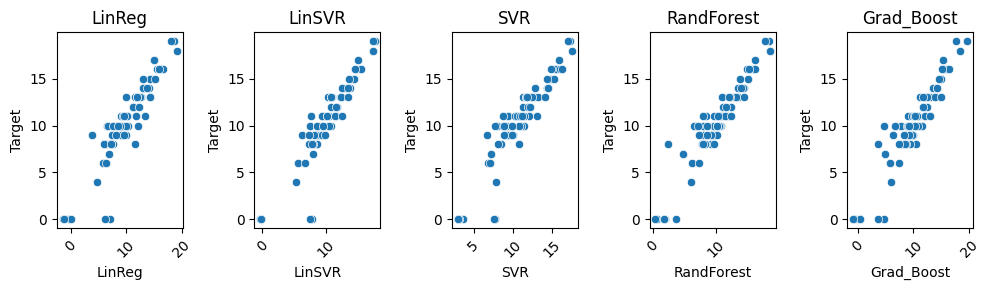

In [ ]:
# USE THIS TO VISUALIZE FINAL PREDICTIONS VS. YTEST
# Visualize scatter of each model's target vs. predictions
# create dataframe with all model predictions and target
new_dict = {'LinReg': lrtestpreds, 'LinSVR': lsvrtestpreds, 'SVR': svrtestpreds,'RandForest':rfrtestpreds,"Grad_Boost":gbrtestpreds, "Target":y_test}
df_pred_true = pd.DataFrame(new_dict, columns=new_dict.keys())
df_pred_true
# Build Scatterplots
fig, axs = plt.subplots(1, 5, figsize=(10,3))

# Set titles for each subplot
axs[0].set_title("LinReg")
axs[1].set_title("LinSVR")
axs[2].set_title("SVR")
axs[3].set_title("RandForest")
axs[4].set_title("Grad_Boost")

# Plot scatterplots on each subplot
sns.scatterplot(data=df_pred_true, x="LinReg", y="Target", ax=axs[0])
sns.scatterplot(data=df_pred_true, x="LinSVR", y="Target", ax=axs[1])
sns.scatterplot(data=df_pred_true, x="SVR", y="Target", ax=axs[2])
sns.scatterplot(data=df_pred_true, x="RandForest", y="Target", ax=axs[3])
sns.scatterplot(data=df_pred_true, x="Grad_Boost", y="Target", ax=axs[4])


# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
axs.flat[4].tick_params(axis='x', labelrotation=45)


fig.tight_layout()

# Show the plot
plt.show()

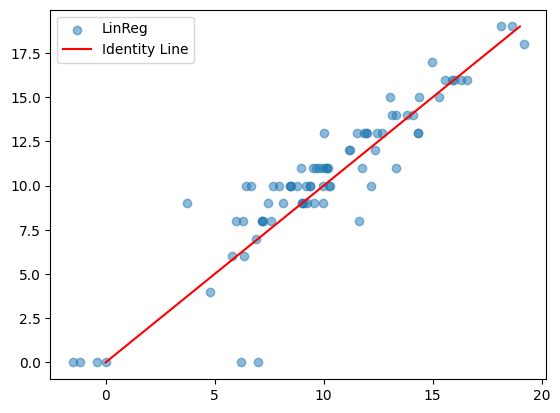

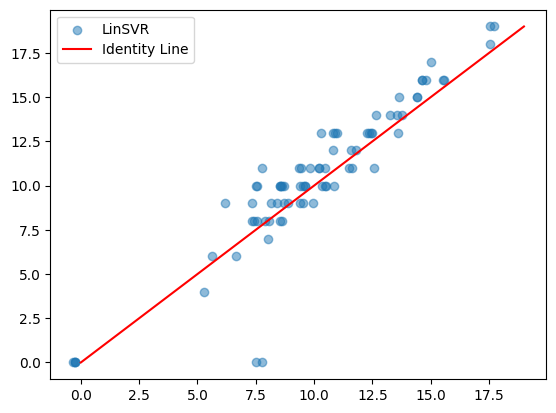

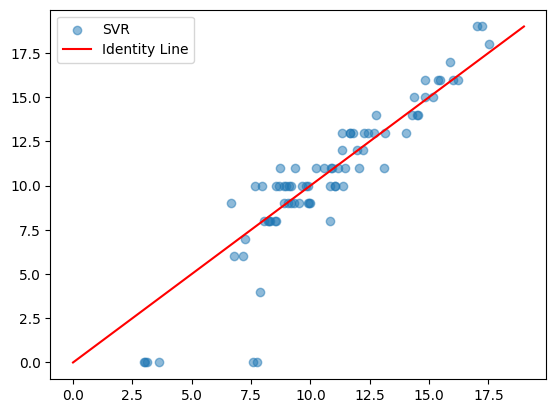

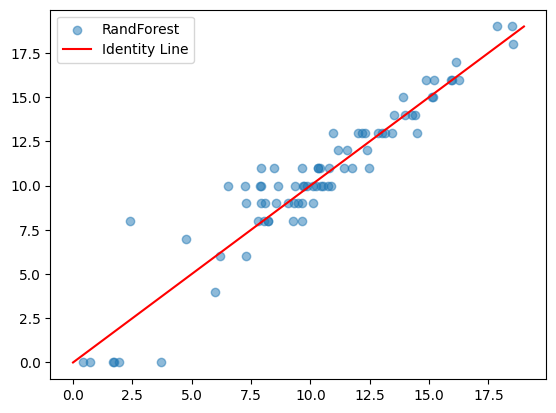

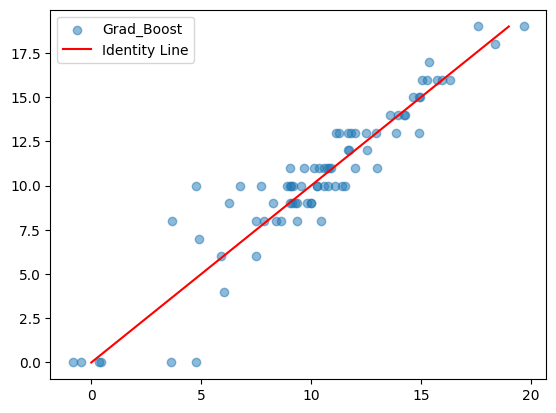

In [ ]:
# Now again in more detail
for i in df_pred_true.columns[:-1]:
    plt.scatter(df_pred_true[i],y_test, alpha=0.5, label=f'{i}')
    # plt.scatter(y_test, gbrpreds, alpha=0.5, label='Gradient Boosting Regression')
    plt.plot(np.arange(20), np.arange(20), c='r', label='Identity Line')
    # Show legend
    plt.legend()
    plt.show()